In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import keras
from sklearn import preprocessing
import tensorflow as tf

In [ ]:
#seperate targets and features
df = pd.read_csv("/content/water_potability.csv")
X = df.drop(["Potability"], axis = 1)
y = df.Potability

In [ ]:
#fill empty data with median
X.fillna(X.median(numeric_only=True).round(1), inplace=True)

In [ ]:
#normalize data
for column in X.columns:
    X[column] = X[column]  / X[column].abs().max()

In [ ]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#make model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(9,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
#model.summary()

In [ ]:
#compile model
model.compile(optimizer="Adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#fit model
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
82/82 [==============================] - 8s 9ms/step - loss: 0.8345 - accuracy: 0.5282 - val_loss: 0.6632 - val_accuracy: 0.6296
Epoch 2/30
82/82 [==============================] - 1s 7ms/step - loss: 0.7730 - accuracy: 0.5477 - val_loss: 0.6589 - val_accuracy: 0.6296
Epoch 3/30
82/82 [==============================] - 1s 7ms/step - loss: 0.7447 - accuracy: 0.5519 - val_loss: 0.6569 - val_accuracy: 0.6296
Epoch 4/30
82/82 [==============================] - 1s 7ms/step - loss: 0.7359 - accuracy: 0.5527 - val_loss: 0.6546 - val_accuracy: 0.6296
Epoch 5/30
82/82 [==============================] - 1s 7ms/step - loss: 0.7201 - accuracy: 0.5634 - val_loss: 0.6524 - val_accuracy: 0.6296
Epoch 6/30
82/82 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5859 - val_loss: 0.6514 - val_accuracy: 0.6311
Epoch 7/30
82/82 [==============================] - 1s 10ms/step - loss: 0.6895 - accuracy: 0.5733 - val_loss: 0.6529 - val_accuracy: 0.6326
Epoch 8/30
82/82 [=

In [ ]:
#save model
model.save('my_model.h5')

In [ ]:
#evaluate model
print("accuracy: " + str(model.evaluate(X_test, Y_test)[1]))

21/21 [==============================] - 0s 6ms/step - loss: 0.6199 - accuracy: 0.6799
accuracy: 0.6798780560493469


In [ ]:
#Finds data values that have over a 95% chance of being potable(drinkable)
model = keras.models.load_model("my_model.h5")
probabilities = model.predict(X_test)
#print(probabilities)
predictions = [0 if prob < 0.12 else 1 for prob in probabilities]
print(predictions)
print(Y_test.head())
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)
print(X_test.iloc[49])
print(cm)




21/21 [==============================] - 0s 4ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

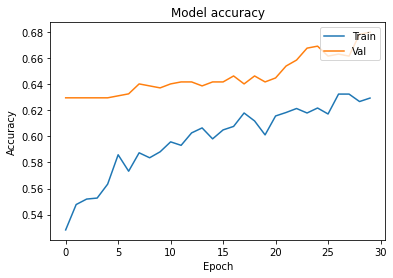

In [ ]:
#plots accuracies, validation is higher because of dropoff
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()